Loss Functions

In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

2022-12-08 20:17:56.771332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 20:17:57.131541: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 20:17:57.131576: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 20:17:57.902969: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
# BINARY CROSSENTROPY
bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)

logits = tf.constant([0.8])
probas = tf.keras.activations.sigmoid(logits)

tf.print(
    'BCE (w probas) : {:.4f}'.format(
        bce_probas(y_true=[1], y_pred=probas)
    ),
    '(w Logits): {:.4f}'.format(
        bce_logits(y_true=[1], y_pred=logits)
    )
)

BCE (w probas) : 0.3711 (w Logits): 0.3711


2022-12-08 20:18:04.135174: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-08 20:18:04.135245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: harsh-IdeaPad-Gaming3-15ARH05D
2022-12-08 20:18:04.135260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: harsh-IdeaPad-Gaming3-15ARH05D
2022-12-08 20:18:04.135454: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-12-08 20:18:04.135509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  515.65.01  Release Build  (dvs-builder@U16-T11-05-2)  Wed Jul 20 13:54:56 UTC 2022
GCC version:

In [3]:
# CATEGORICAL CROSSENTROPY
cce_probas = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

tf.print(
    'CCE (w Probas): {:.4f}'.format(
    cce_probas(y_true=[[0, 0, 1]], y_pred=probas)),
    '(w Logits): {:.4f}'.format(
    cce_logits(y_true=[[0, 0, 1]], y_pred=logits)))

CCE (w Probas): 0.5996 (w Logits): 0.5996


In [4]:
# SPARSE CATEGORICAL CROSSENTROPY
sp_cce_probas = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
sp_cce_logits = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

tf.print(
    'Sparse CCE (w Probas): {:.4f}'.format(
    sp_cce_probas(y_true=[[0, 0, 1]], y_pred=probas)),
    '(w Logits): {:.4f}'.format(
    sp_cce_logits(y_true=[[0, 0, 1]], y_pred=logits)))

Sparse CCE (w Probas): 0.5996 (w Logits): 0.5996


**A MULTIPLAYER CNN**

*Input layer: [batchsize x 28 x 28 x 1]* <br>
*Conv_1: [batchsize × 28 × 28 × 32]* <br>
*Pooling_1: [batchsize × 14 × 14 × 32]* <br>
*Conv_2: [batchsize × 14 × 14 × 64]* <br>
*Pooling_2: [batchsize × 7 × 7 × 64]* <br>
*FC_1: [batchsize × 1024]* <br>
*FC_2 and softmax layer: [batchsize × 10]* <br>

Loading and preprocessing the image

In [5]:
# loading the data
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()

datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [7]:
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0,
    tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0,
    tf.cast(item['label'], tf.int32)))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=False)
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

IMPLEMENTING A **CNN** USING TENSORFLOW KERAS API

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last', #NHWC
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))

model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2'))

In [12]:
model.compute_output_shape(input_shape=(None, 28, 28, 1))

TensorShape([None, 7, 7, 64])

In [13]:
# NOW WE NEED TO ADD OUR FULLY CONECTED LAYERS
model.add(tf.keras.layers.Flatten())
model.compute_output_shape(input_shape=(None, 28, 28, 1))

TensorShape([None, 3136])

In [14]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))

# For Regularization
model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [15]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              3212288   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [17]:
history = model.fit(mnist_train, epochs=NUM_EPOCHS, validation_data=mnist_valid, shuffle=True)

Epoch 1/20
782/782 [==============================] - 76s 94ms/step - loss: 0.1466 - accuracy: 0.9539 - val_loss: 0.0529 - val_accuracy: 0.9827
Epoch 2/20
782/782 [==============================] - 72s 92ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0470 - val_accuracy: 0.9867
Epoch 3/20
782/782 [==============================] - 72s 91ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 4/20
782/782 [==============================] - 72s 92ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0421 - val_accuracy: 0.9881
Epoch 5/20
782/782 [==============================] - 72s 92ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0368 - val_accuracy: 0.9904
Epoch 6/20
782/782 [==============================] - 73s 92ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0347 - val_accuracy: 0.9905
Epoch 7/20
782/782 [==============================] - 63s 80ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0381 - val_accuracy:

In [18]:
test_results = model.evaluate(mnist_test.batch(20))
print('Test Acc.: {:.2f}\%'.format(test_results[1]*100))

500/500 [==============================] - 5s 9ms/step - loss: 0.0527 - accuracy: 0.9912
Test Acc.: 99.12\%


establishing class-membership probabilities

In [19]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])
tf.print(preds.shape)

TensorShape([12, 10])


In [20]:
preds = tf.argmax(preds, axis=1)
print(preds)

tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


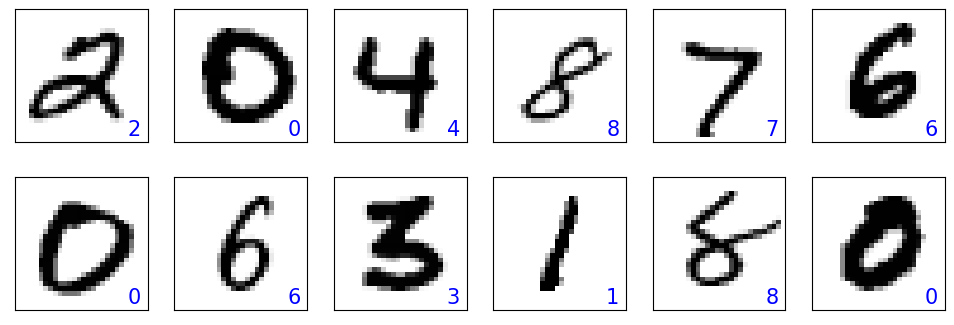

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]),
        size=15, color='blue',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
        
plt.show()